In [29]:
# Bu çalışmada kullanılan veri seti (dataR2.csv), UCI Makine Öğrenmesi veri deposundan temin edilmiştir
# Meme kanseri olan 64 hasta ve 52 sağlıklı kontrol grubu hastası için klinik özellikler gözlemlenmiş veya ölçülmüştür 
# Tümü sayısal olan 10 tahmini sağlayan nitelik ve meme kanserinin varlığını (1 ile kodlanmış) ya da yokluğunu (2 ile kodlanmış) gösteren ikili kategoriden oluşan bir hedef nitelik (Classification) bulunmaktadır.
# Bu çalışmanın temel amacı; meme kanseri için k-NN algoritması ile bir öngörü (tahmin) modeli oluşturmaktır.

| Nitelik | Türkçesi | Veri Tipi |
|----------|----------|----------|
| Age (years)   | Yaş (yıl) | Sayısal  |
| BMI (kg/m2)  | VKİ (kg/m2) | Sayısal  |
| Glucose (mg/dL)  | Glikoz (mg/dL)  | Sayısal  |
| Insulin (µU/mL)  | İnsülin (µU/mL) | Sayısal  |
| HOMA  | Homeostatik Model Değerlendirmesi   | Sayısal  |
| Leptin (ng/mL)  | Leptin Hormonu (ng/mL)   | Sayısal  |
| Adiponectin (µg/mL)  |Adiponektin Hormonu (µg/mL)  | Sayısal  |
| Resistin (ng/mL)  | Resistin Hormonu (ng/mL)  | Sayısal   |
| MCP-1(pg/dL) | Monosit Kemotaktik Proteini   | Sayısal  |
| Classification **(Hedef Nitelik)**  | Hasta ya da sağlıklı olma durumunu gösteren karar değişkeni   | Kategorik  | 



In [46]:
#  Çalışma için Gerekli Kütüphanelerin Yüklenmesi
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report,accuracy_score,recall_score

In [31]:
verSeti=pd.read_csv("dataR2.csv")

In [32]:
# Veri Ön-işleme

#Colan adı değiştirme 
verSeti=verSeti.rename(columns={"Classification":"Karar"})
verSeti["Karar"].value_counts()


Karar
2    64
1    52
Name: count, dtype: int64

In [33]:
#Nitelik adlarını değiştirme
verSeti["Karar"]=np.where(verSeti["Karar"]==1,"Sağlıklı","Kanser")

In [34]:
verSeti["Karar"].value_counts()

Karar
Kanser      64
Sağlıklı    52
Name: count, dtype: int64

In [35]:
# Karar kolonunun veri tipini kategori yapma 
verSeti.Karar=verSeti.Karar.astype("category")
pd.set_option("display.max_columns",20)
verSeti.describe(include="all")

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Karar
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kanser
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,NaN
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,NaN
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,NaN
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,NaN
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,NaN
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,NaN


In [36]:
verSeti.dtypes

Age               int64
BMI             float64
Glucose           int64
Insulin         float64
HOMA            float64
Leptin          float64
Adiponectin     float64
Resistin        float64
MCP.1           float64
Karar          category
dtype: object

In [37]:
#Eksik değer kontrolü
print(verSeti.isnull().sum())

Age            0
BMI            0
Glucose        0
Insulin        0
HOMA           0
Leptin         0
Adiponectin    0
Resistin       0
MCP.1          0
Karar          0
dtype: int64


In [38]:
# Hedef nitelik hariç diğer tüm nitelikleri içeren korelasyon ısı haritası aşağıdaki kodlar yardımı ile oluşturulmuştur
my_cors= pd.DataFrame(np.corrcoef(verSeti.iloc[:,0:9],rowvar=False).round(2),verSeti.columns[0:9])
my_cors.index=verSeti.columns[0:9]
#Kolerasyon Isı haritası


In [39]:
my_cors


,0,1,2,3,4,5,6,7,8
Age,1.00,0.01,0.23,0.03,0.13,0.10,-0.22,0.00,0.01
BMI,0.01,1.00,0.14,0.15,0.11,0.57,-0.30,0.20,0.22
Glucose,0.23,0.14,1.00,0.50,0.70,0.31,-0.12,0.29,0.26
Insulin,0.03,0.15,0.50,1.00,0.93,0.30,-0.03,0.15,0.17
HOMA,0.13,0.11,0.70,0.93,1.00,0.33,-0.06,0.23,0.26
Leptin,0.10,0.57,0.31,0.30,0.33,1.00,-0.10,0.26,0.01
Adiponectin,-0.22,-0.30,-0.12,-0.03,-0.06,-0.10,1.00,-0.25,-0.20
Resistin,0.00,0.20,0.29,0.15,0.23,0.26,-0.25,1.00,0.37
MCP.1,0.01,0.22,0.26,0.17,0.26,0.01,-0.20,0.37,1.00


In [40]:
my_cors.index

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1'],
      dtype='object')

<Axes: >

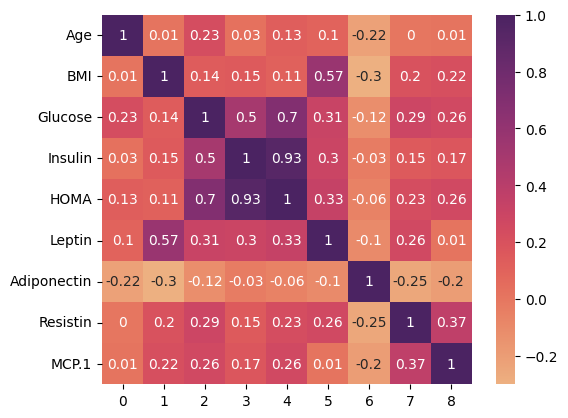

In [41]:
sns.heatmap(my_cors,annot=True,square=True,cmap=sns.color_palette("flare",as_cmap=True))


In [42]:
X_train,X_test,y_train,y_test=train_test_split(verSeti.iloc[:,0:9],verSeti.iloc[:,9],test_size=0.3,random_state=1)

In [68]:
verSeti.iloc[:,9]

0      Sağlıklı
1      Sağlıklı
2      Sağlıklı
3      Sağlıklı
4      Sağlıklı
         ...   
111      Kanser
112      Kanser
113      Kanser
114      Kanser
115      Kanser
Name: Karar, Length: 116, dtype: category
Categories (2, object): ['Kanser', 'Sağlıklı']

In [43]:
scaler=MinMaxScaler()
X_train_n=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_n=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [69]:
X_test_n.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.511209,0.441862,0.285714,0.150433,0.103326,0.273965,0.226751,0.128961,0.262790
std,0.223103,0.238388,0.176158,0.167114,0.152628,0.196766,0.192014,0.104567,0.180675
min,0.061538,0.037739,0.071942,-0.001931,0.004189,0.040037,0.014794,0.000761,0.027083
25%,0.323077,0.235669,0.194245,0.035569,0.023685,0.117894,0.100774,0.031173,0.171132
50%,0.538462,0.458517,0.244604,0.103720,0.057188,0.204635,0.182231,0.105084,0.211896
75%,0.692308,0.607193,0.309353,0.176797,0.098823,0.416501,0.257230,0.220665,0.331632
max,0.953846,0.911494,1.014388,0.698695,0.820216,0.746772,0.882091,0.361014,1.000000


In [51]:
#Modelleme 
# k-NN modelinin (knn_modeli) oluşturulabilmesi için KNeighborsClassifier() kullanılmıştır.
knn_modeli=KNeighborsClassifier(n_neighbors=5,metric="euclidean")
knn_modeli.fit(X_train_n,y_train)

KNeighborsClassifier(metric='euclidean')

In [54]:
#Performans Değerlendirmne
# Test veri setindeki örnekler için oluşturulan k-NN modeli (knn_modeli) tahminlerinin bulunabilmesi için lr_model.predict() fonksiyonundan yararlanılabilir.
y_tahmin=knn_modeli.predict(X_test_n)
print("k-NN Modeli Tahminleri:",y_tahmin[0:5])
print("k-NN Modeli Tahminleri:",np.array(y_test[0:5]))

k-NN Modeli Tahminleri: ['Kanser' 'Kanser' 'Kanser' 'Kanser' 'Kanser']
k-NN Modeli Tahminleri: ['Kanser' 'Sağlıklı' 'Kanser' 'Kanser' 'Kanser']


In [58]:
# Kontenjans tablosu oluşturmak için en basit yöntem olarak sklearn.metrics modülünden confusion_matrix() fonksiyonu kullanılabilir.
my_cm=confusion_matrix(y_true=y_test,y_pred=y_tahmin,labels=["Sağlıklı","Kanser"])
my_cm

array([[ 7,  5],
       [ 4, 19]], dtype=int64)

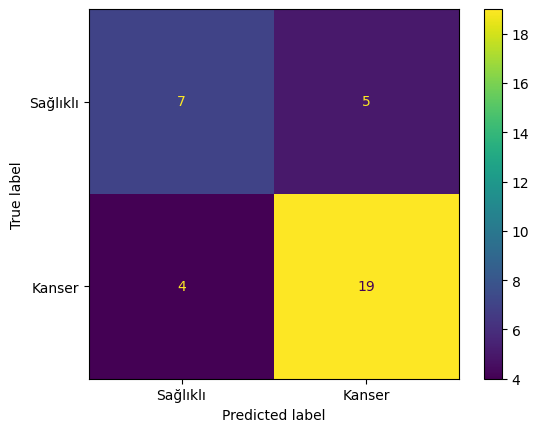

In [60]:
my_cm_p=ConfusionMatrixDisplay(my_cm,display_labels=["Sağlıklı","Kanser"])
my_cm_p.plot()

In [62]:
tn,fp,fn,tp=my_cm.ravel()

In [63]:
dogruluk=(tp+tn)/(tp+fp+fn+tn) #Performans
hata=1-dogruluk

duyarlılık=tp/(tp+fn)  
FNR=1-duyarlılık

belirleyicilik=tn/(tn+fp)
FPR=1-belirleyicilik

kesinlik=tp/(tp+fp)

negatiflik=tn/(tn+fn)

fOlcusu=(2*duyarlılık*kesinlik) / (duyarlılık+kesinlik)


In [66]:
rapor=classification_report(y_true=y_test,y_pred=y_tahmin,labels=["Sağlıklı","Kanser"])
print(rapor)

              precision    recall  f1-score   support

    Sağlıklı       0.64      0.58      0.61        12
      Kanser       0.79      0.83      0.81        23

    accuracy                           0.74        35
   macro avg       0.71      0.70      0.71        35
weighted avg       0.74      0.74      0.74        35



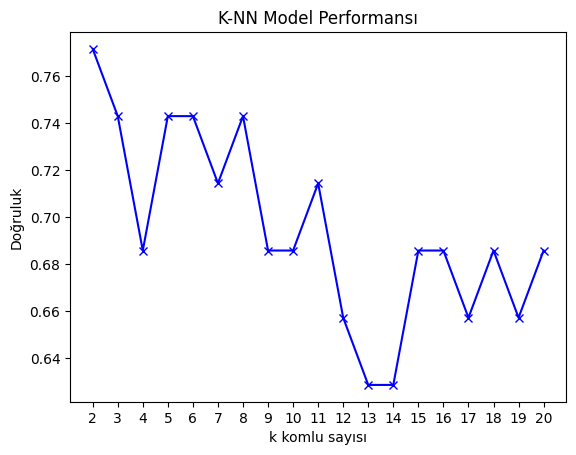

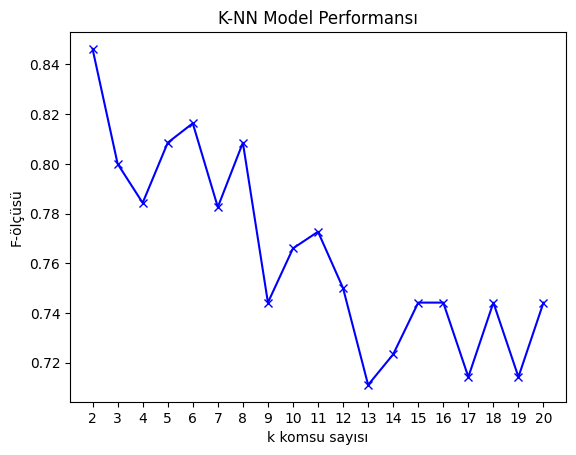

In [73]:
# En iyi k komşu sayısının belirlenmesi 
from sklearn.metrics import f1_score

dogruluk=[]
fOlcusu=[]
k=range(2,21)
for i in k:
    knn_modeli=KNeighborsClassifier(n_neighbors=i,metric="euclidean")
    knn_modeli.fit(X_train_n,y_train)
    y_tahmin=knn_modeli.predict(X_test_n)
    dgrlk=accuracy_score(y_test,y_tahmin)
    fOlc=f1_score(y_test,y_tahmin,average='binary',pos_label="Kanser").round(4)
    dogruluk.append(dgrlk)
    fOlcusu.append(fOlc)

plt.plot(k,dogruluk,'bx-')
plt.xticks(k)
plt.title("K-NN Model Performansı")
plt.xlabel("k komlu sayısı")
plt.ylabel("Doğruluk")
plt.show()

plt.plot(k,fOlcusu,'bx-')
plt.xticks(k)
plt.title("K-NN Model Performansı")
plt.xlabel("k komsu sayısı")
plt.ylabel("F-ölçüsü")
plt.show()